# Anayzing  westbound traffic on the I-94 Interstate highway

John Hogue made the dataset available, and you can download it from the UCI Machine Learning Repository.

GOAL "To determine a few indicators of heavy traffic on I-94. "
These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [22]:
import pandas as pd
Metro_Interstate = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

In [23]:
Metro_Interstate.head(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [24]:
Metro_Interstate.tail(5)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [25]:
Metro_Interstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume
We will examin the distribution of the traffic_volume column.

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([8089., 5102., 2839., 4753., 4770., 4342., 7888., 5636., 3857.,
         928.]),
 array([   0.,  728., 1456., 2184., 2912., 3640., 4368., 5096., 5824.,
        6552., 7280.]),
 <a list of 10 Patch objects>)

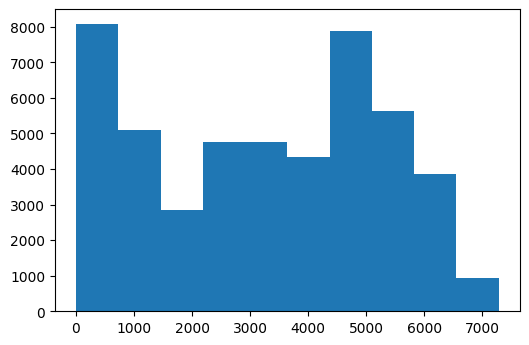

In [27]:
plt.hist(Metro_Interstate["traffic_volume"])

In [28]:
Metro_Interstate["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

There is traffic volume of 0 to 7,280.
The average is 3259.
25% of the time the traffic volume is 1,193, 50% of the time the traffic volume is 3,380, 75% of the time the traffic volume was 7,280.


It is likely that the low volume of traffic happens during nighttime.

# Separate daytime and nighttime

Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)

Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [29]:
Metro_Interstate["date_time"] =pd.to_datetime(Metro_Interstate["date_time"])

In [30]:
day = Metro_Interstate.copy()[(Metro_Interstate["date_time"].dt.hour >= 7) & (Metro_Interstate["date_time"].dt.hour < 19)]
print(day.shape)
night = Metro_Interstate.copy()[(Metro_Interstate["date_time"].dt.hour >= 19) | (Metro_Interstate["date_time"].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


Make a histogram to compare night and day traffic volume

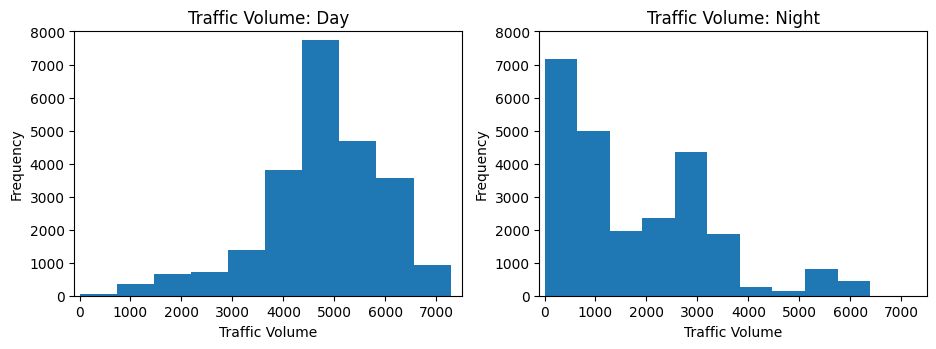

In [31]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.xlim(-100, 7500)
plt.ylim(0, 8000)

plt.show()

The histogram indicates tha in day time the traffic volume is larger.
Since our goal here is to find the indicator of high traffic, we will now focus on daytime traffic.

In [32]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

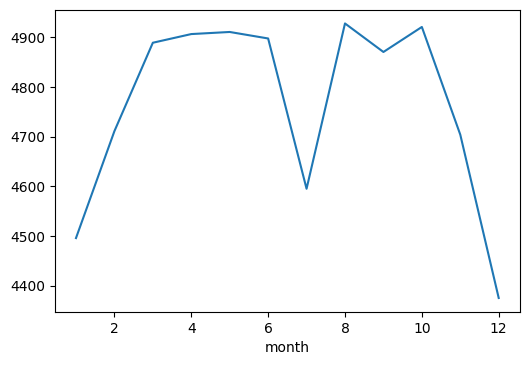

In [33]:
by_month['traffic_volume'].plot.line()

February to June and August to November seems to be high traffic volume. There seem to be a big drop in July.

## analyze traffic volume of each day of the week on average

In [34]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] 

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

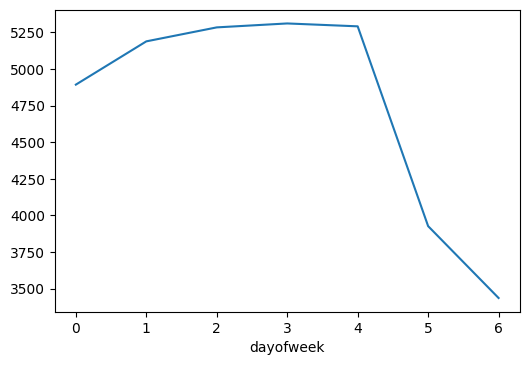

In [35]:
by_dayofweek['traffic_volume'] .plot.line()

0 is Monday, 6 is Sunday
The traffic volume drops significantly in weekends

In [36]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


Text(0.5, 1.0, 'changes during weekends')

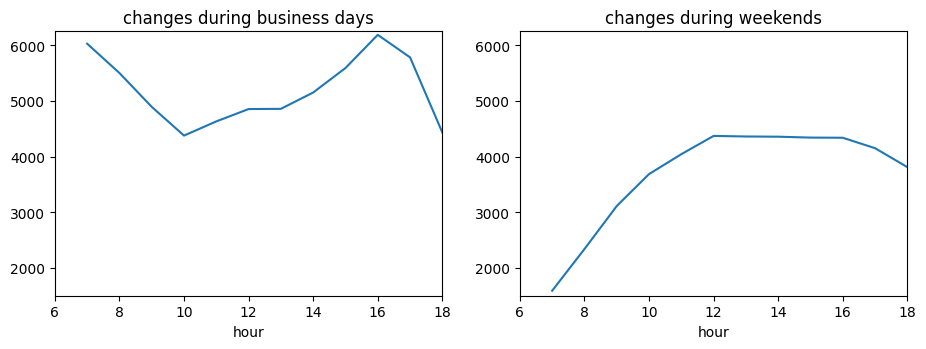

In [37]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6, 18)
plt.ylim(1500, 6250)
plt.title("changes during business days")



plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6, 18)
plt.ylim(1500, 6250)
plt.title("changes during weekends")

The traffic volume is overall much larger in business days, On business days,the morning time and evening has the most traffic. Probably due to people going and coming back from work.

## Analyzing relation between weather and traffic volume

In [38]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The correlation of traffic volumn and wealther column(temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description), shows that only "temp" has a slight number 0.12.
We will look in to this part.

(240.0, 320.0)

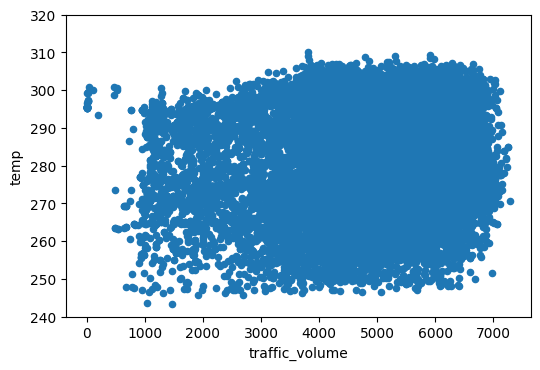

In [46]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(240, 320)

There seem to be no connection between temperature and traffic volumn.
We'll now look next at the categorical weather-related columns: weather_main and weather_description

In [47]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

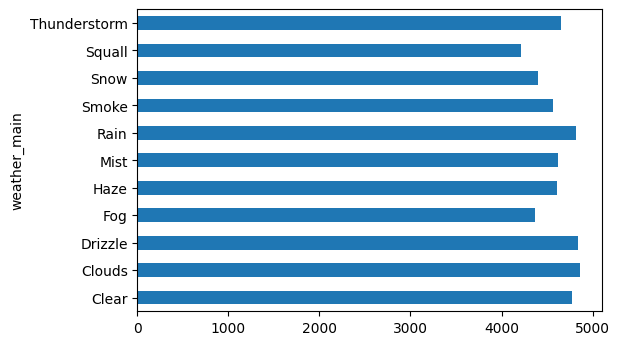

In [50]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There seem to be no connection between temperature and'weather_main'. 
Also, no traffic volumn exceed 5000cars.

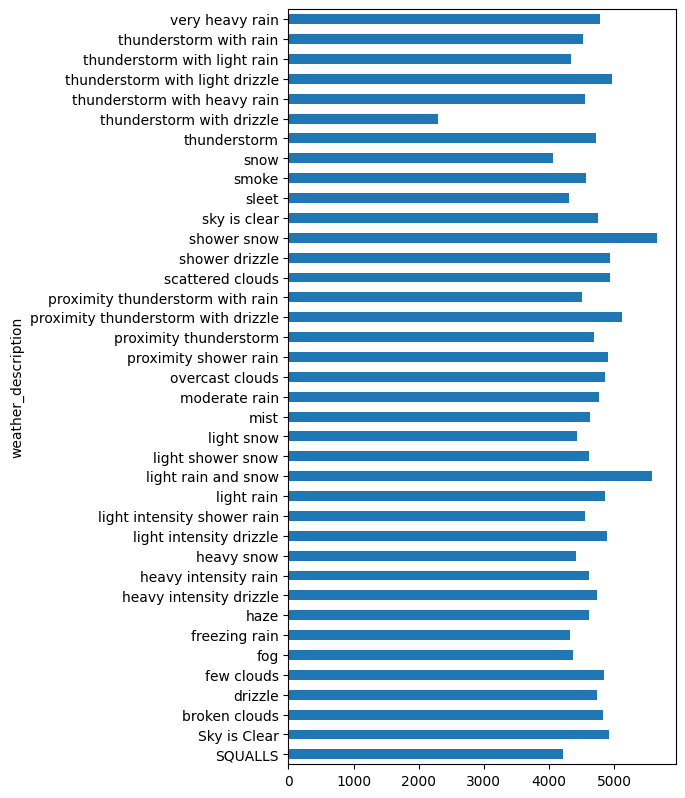

In [62]:
plt.figure(figsize=(5,10))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

A few bars exceed 5000cars, for instance 'light rain and snow' and 'Shower snow'.Indicating that snow maybe one cause of traffic.

# Conclusion

We have looked at westbound traffic on the I-94 Interstate highway.
Through the analysis we have few indication of the cause of traffic, which are：<br> 
-Cold months (November–February)<br> 
-On business days compared to weekends<br> 
-On business days, the rush hours are around 7 and 16<br> 

Weather indicator    <br> 
-Shower snow.<br> 
-Light rain and snow 